<a href="https://colab.research.google.com/github/AmberbirMehabaw/Geez-HCR/blob/main/Geez%20HCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

In [ ]:
values = pd.read_csv('train_header.csv')
labels = pd.read_csv('label_header.csv')

In [ ]:
xtrain = values[:18000]
ytrain = labels[:18000]
xtest = values[18000:20000]
ytest = labels[18000:20000]
xval = values[20000:]
yval = labels[20000:]

In [ ]:
Xtrain = np.asarray(xtrain)
Ytrain = np.asarray(ytrain)
Xtest = np.asarray(xtest)
Ytest = np.asarray(ytest)
Xval = np.asarray(xval)
Yval = np.asarray(yval)


In [ ]:
len(np.unique(Ytrain))
no_labels=np.unique(Ytrain)
no_labels

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
Ltrain = to_categorical(Ytrain)
Ltest = to_categorical(Ytest)
Lval = to_categorical(Yval)
print(Ltrain.shape)

(18000, 326)


In [ ]:

x_train = Xtrain.astype('float32') / 255
x_test = Xtest.astype('float32') / 255

x_val = Xval.astype('float32')/255


x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1) )
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1) )

x_val = np.reshape(x_val, (x_val.shape[0], 28, 28, 1))


In [ ]:
# network parameters
# input_shape = (784, 1)
batch_size = 32
kernel_size = 3
filters = 64
dropout = 0.3
x_train[0].shape

(28, 28, 1)

In [ ]:
# use functional API to build cnn layers
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
                kernel_size=kernel_size,
                activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
            kernel_size=kernel_size,
            activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
            kernel_size=kernel_size,
            activation='relu')(y)

# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)
# print(len(np.unique(num_labels))
outputs = Dense(325, activation='softmax')(y)

In [ ]:
# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)
# network model in text
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 326)                 │         188,102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,598 (1.00 MB)

 Trainable params: 262,598 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


In [ ]:
# train the model with input images and labels
history = model.fit(x_train,
            Ltrain,
            validation_data=(x_val, Lval),
            epochs=10,
            batch_size=batch_size)
# model accuracy on test dataset
score = model.evaluate(x_test,
                        Ltest,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.0027 - loss: 5.7841 - val_accuracy: 0.0605 - val_loss: 4.9082
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.0792 - loss: 4.6434 - val_accuracy: 0.2871 - val_loss: 3.1433
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.2268 - loss: 3.3746 - val_accuracy: 0.4310 - val_loss: 2.4365
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.3215 - loss: 2.8058 - val_accuracy: 0.4757 - val_loss: 2.1147
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.3911 - loss: 2.4168 - val_accuracy: 0.5148 - val_loss: 1.8846
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.4390 - loss: 2.1771 - val_accuracy: 0.5814 - val_loss: 1.6860
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.4772 - loss: 1.9893 - val_accuracy: 0.5971 - val_loss: 1.5654
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.5032 - loss: 1.8588 - 

In [ ]:
score = model.evaluate(x_test, Ltest, )
score

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5459 - loss: 1.8792


[1.6582577228546143, 0.5874999761581421]

In [ ]:
from matplotlib import pyplot as plt

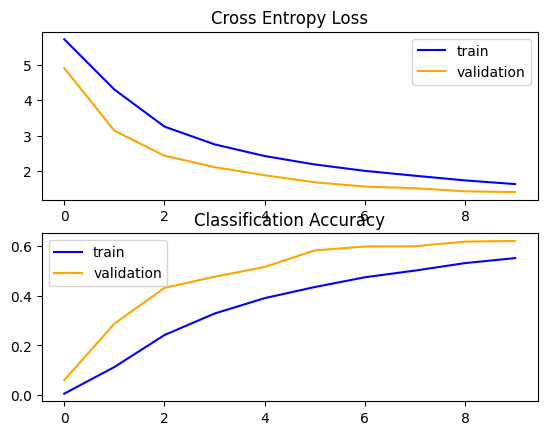

In [ ]:
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()
plt.show()

In [ ]:
#history.history

In [ ]:
# result = model.predict(x_train[15002:15003])


In [ ]:
from tensorflow.keras.models import save_model, load_model

#save_model(model, 'es_final')
#save_model(model, 'es_final_1')
save_model(model, 'es_final_1_2')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=es_final_1_2.

In [ ]:
# c.predict(x_train[2:3])

In [ ]:
from tensorflow.keras.models import save_model, load_model
c = load_model('es_final_1_2')

In [ ]:
x = x_train[10]
x.shape
from matplotlib import pyplot as plt
plt.imshow(x)

x.shape


In [ ]:
plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(score[0], color='blue', label='acc')

plt.legend()
plt.show()

In [ ]:
Ltest.shape

In [ ]:
# classification matrix

In [ ]:
pred = c.predict(x_test)
pred.shape

In [ ]:
pre_labels = []
for i in pred:
    pre_labels.append(np.argmax(i))

In [ ]:
test_labels = []
for i in Ltest:
    test_labels.append(np.argmax(i))

# test_labels

In [ ]:
pre_labels = np.array(pre_labels)
test_labels = np.array(test_labels)
pre_labels.shape

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, f1_score, recall_score

In [ ]:
cm = (confusion_matrix(test_labels, pre_labels))
cm[4]

In [ ]:
print("accuracy : %.2f%%" % (accuracy_score(test_labels, pre_labels)*100))
#print("ROC AUC : %.2f%%" % (recall_score(test_labels, pre_labels, labels=[], average='macro'*100))
print("RECALL : %.2f%%" % (recall_score(test_labels, pre_labels, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12, 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38, 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64, 65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90, 91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324], average='macro')*100))
print("PRECION : %.2f%%" % (precision_score(test_labels, pre_labels, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12, 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38, 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64, 65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90, 91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324], average='macro')*100))
print("f_score : %.2f%%" % (f1_score(test_labels, pre_labels, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12, 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38, 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64, 65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90, 91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324], average='macro')*100))

In [ ]:
arr = np.asarray([1,2,3,4])
arr

In [ ]:
np.where(arr == np.max(arr))

In [ ]:
from keras.utils.vis_utils import plot_model
import pydot

In [ ]:
plot_model(model, to_file = "1.png", show_shapes=True, show_layer_names=True)

In [ ]:
print(classification_report(test_labels, pre_labels, zero_division = 0))